<a href="https://colab.research.google.com/github/anisbagwan/Bike-sharing-demand-prediction/blob/main/US_Airline_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

For example, it contains whether the sentiment of the tweets in this set was positive, neutral, or negative for six US airlines:

The information of main attributes for this project as follows;

* alirline_sentiment : Sentiment classification.(positivie, neutral, and negative)
* negativereason : Reason selected for the negative opinion
* airline : Name of 6 US Airlines('Delta', 'United', 'Southwest', 'US Airways', 'Virgin America', 'American')
* text : Customer's opinion

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/US Airline Sentiment analysis/Tweets.csv')

Observe the dataset:

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


Columns in dataset:


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df.shape

(14640, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
#checking percentage of missing values in a column
df.isnull().sum()/len(df)*100

tweet_id                        0.0
airline_sentiment               0.0
airline_sentiment_confidence    0.0
negativereason                  0.0
negativereason_confidence       0.0
airline                         0.0
airline_sentiment_gold          0.0
name                            0.0
negativereason_gold             0.0
retweet_count                   0.0
text                            0.0
tweet_coord                     0.0
tweet_created                   0.0
tweet_location                  0.0
user_timezone                   0.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


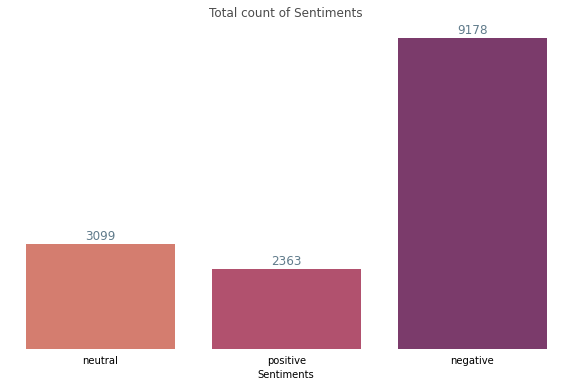

In [ ]:
# Let's check the dependent variable first...
plt.figure(figsize=(10,6))


# Plotting the values in dependent variable
ax=sns.countplot(df['airline_sentiment'],palette='flare')

# make one bar, the python bar, a contrasting color
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12,color='#607B8B', 
                   xytext=(0, 8),
                   textcoords='offset points')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="Sentiments", ylabel = "")
plt.title('Total count of Sentiments',alpha=0.7)


plt.show()

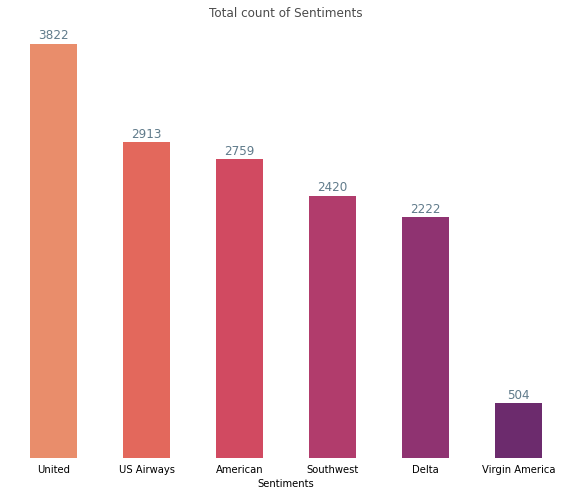

In [ ]:
# Let's check the dependent variable first...
plt.figure(figsize=(10,6))
colors=sns.color_palette('flare',6)

# Plotting the values in dependent variable
ax=pd.Series(df['airline']).value_counts().plot(kind="bar",color=colors,
                                                figsize=(10,8),fontsize=10,
                                                rot=0,title='Total No. of Tweets of Airline')

# make one bar, the python bar, a contrasting color
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12,color='#607B8B', 
                   xytext=(0, 8),
                   textcoords='offset points')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="Sentiments", ylabel = "")
plt.title('Total count of Sentiments',alpha=0.7)


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


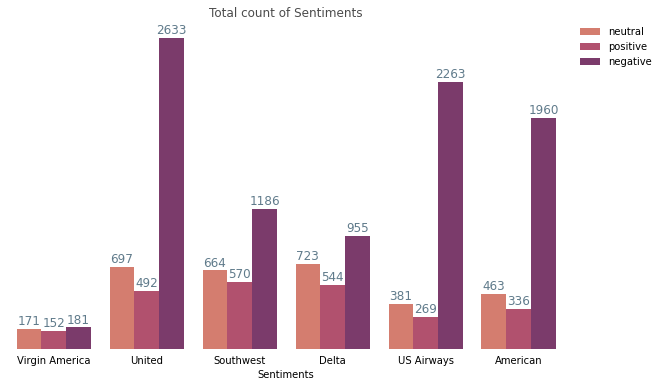

In [ ]:
# Let's check the dependent variable first...
plt.figure(figsize=(10,6))


# Plotting the values in dependent variable
ax=sns.countplot(df['airline'],hue='airline_sentiment',data=df,palette='flare')

# make one bar, the python bar, a contrasting color
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12,color='#607B8B', 
                   xytext=(0, 8),
                   textcoords='offset points')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="Sentiments", ylabel = "")
plt.title('Total count of Sentiments',alpha=0.7)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)

plt.show()

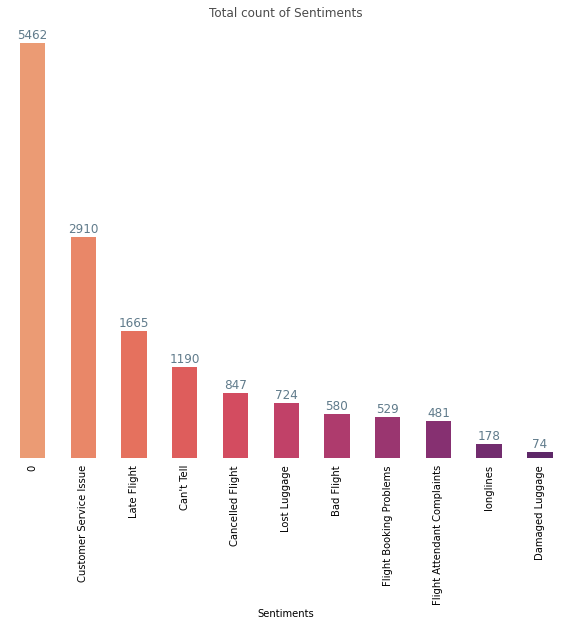

In [ ]:
# Let's check the dependent variable first...
plt.figure(figsize=(10,6))
colors=sns.color_palette('flare',11)

# Plotting the values in dependent variable
ax=pd.Series(df['negativereason']).value_counts().plot(kind="bar",color=colors,
                                                figsize=(10,8),fontsize=10,
                                                rot=90,title='Total No. of Tweets of Airline')

# make one bar, the python bar, a contrasting color
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12,color='#607B8B', 
                   xytext=(0, 8),
                   textcoords='offset points')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="Sentiments", ylabel = "")
plt.title('Total count of Sentiments',alpha=0.7)


plt.show()